# Checkpoint 2 - Quântica

---

## Alunos
> Henrico Nardelli Bela | Daniel Barros
## RMs
> RM 95985 | RM 94026
## Turma
> 2TIAR
## Emails
> henrico.developer@gmail.com / rm95985@fiap.com.br
> daniel.f.barros@hotmail.com / rm94026@fiap.com.br

# Algoritmo escolhido
### Simon’s: https://learn.qiskit.org/course/ch-algorithms/simons-algorithm 

---

# Imports

In [1]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

### Explicação dos Imports

    from qiskit import IBMQ 
> Aer: Isso importa as classes IBMQ e Aer do pacote Qiskit.<br>
> IBMQ é usado para interagir com os provedores de dispositivos quânticos da IBM e Aer é um simulador quântico de alta performance.<br>

    from qiskit.providers.ibmq import least_busy
> Isso importa a função least_busy do submódulo ibmq do pacote Qiskit. Essa função é usada para encontrar o dispositivo quântico menos ocupado disponível na IBM Quantum Experience, caso você queira executar seu circuito em hardware real.<br>

    from qiskit import QuantumCircuit, transpile
> Isso importa as classes QuantumCircuit e transpile do pacote Qiskit. QuantumCircuit é usado para criar e manipular circuitos quânticos, enquanto transpile é usado para otimizar e adaptar circuitos para diferentes tipos de dispositivos quânticos ou simuladores.<br>

    from qiskit.visualization import plot_histogram
> Isso importa a função plot_histogram do submódulo visualization do pacote Qiskit. Essa função é usada para visualizar os resultados da execução de um circuito quântico em forma de histograma.<br>

    from qiskit_textbook.tools import simon_oracle
> Isso importa a função simon_oracle do pacote qiskit_textbook.tools. Esta função é usada para criar um oráculo de Simon, que é um componente importante no algoritmo de Simon.

---

# Preparação dos Circuitos

In [2]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
     ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

### Explicação da preparação dos circuitos

    b = '110': 

> Isso define uma string b com o valor '110'. Esse valor é um exemplo de uma sequência binária que representa uma função secreta que o algoritmo de Simon tentará descobrir.

    n = len(b): 

> Isso calcula o comprimento da string b, que determina o tamanho do espaço de entrada do algoritmo de Simon. Neste caso, n será igual a 3.

    simon_circuit = QuantumCircuit(n*2, n): 

> Isso cria um objeto QuantumCircuit chamado simon_circuit com dois registros quânticos. O primeiro registro tem o dobro do tamanho de n, ou seja, 2n, enquanto o segundo registro tem tamanho n. O primeiro registro é usado para armazenar as informações da função secreta e o segundo registro é usado para armazenar a resposta do algoritmo.

    simon_circuit.h(range(n)): 

> Isso aplica portas Hadamard (Hadamard gates) aos primeiros n qubits do circuito. Essas portas Hadamard são usadas para criar superposições nos qubits de entrada, o que é uma etapa fundamental no algoritmo de Simon.

    simon_circuit.barrier(): 

> Isso adiciona uma barreira visual no circuito para separar visualmente as diferentes etapas do algoritmo.

    simon_circuit = simon_circuit.compose(simon_oracle(b)): 

> Aqui, o oráculo de Simon é aplicado ao circuito. A função simon_oracle(b) cria um oráculo específico com base no valor da string b. O oráculo é então adicionado ao circuito usando compose, o que significa que o circuito atual é estendido com as operações do oráculo.

    simon_circuit.barrier(): 

> Mais uma barreira visual é adicionada para separar as etapas do circuito.

    simon_circuit.h(range(n)): 

> Agora, portas Hadamard são aplicadas novamente aos primeiros n qubits do circuito. Isso é feito após a consulta ao oráculo e antes da medição dos qubits de entrada.

    simon_circuit.measure(range(n), range(n)): 

> Isso adiciona operações de medição para os primeiros n qubits do circuito, onde range(n) especifica os índices dos qubits a serem medidos. Os resultados das medições serão usados para deduzir a função secreta.

    simon_circuit.draw(): 

> Esta linha gera uma representação visual do circuito quântico.

---

# Gerando simulador Local

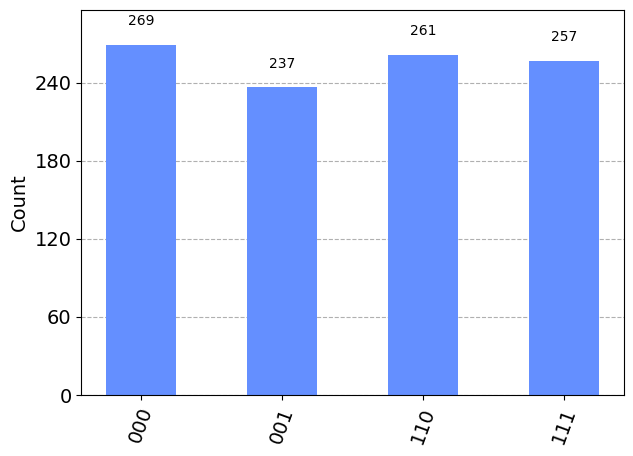

In [3]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

### Explicand Simulador local

    aer_sim = Aer.get_backend('aer_simulator'): 
> Essa linha cria um objeto chamado aer_sim, que representa um simulador quântico local. O Aer é um módulo do Qiskit que fornece acesso a vários simuladores quânticos de alto desempenho. Aer.get_backend('aer_simulator') é usado para obter uma instância do simulador quântico específico chamado "aer_simulator".

    results = aer_sim.run(simon_circuit).result(): 
> Nesta linha, o circuito quântico simon_circuit é executado no simulador aer_sim. O método run() é chamado no objeto aer_sim, e o resultado da execução é obtido usando o método .result(). Isso significa que o simulador está processando o circuito quântico e registrando os resultados.

    counts = results.get_counts(): 
> Após a execução do circuito no simulador, os resultados são obtidos usando o método get_counts(). Isso cria um objeto counts que contém as contagens das medidas feitas nos qubits de saída do circuito. As contagens representam quantas vezes cada resultado foi observado durante a execução do circuito.

    plot_histogram(counts): 
> Esta linha gera um histograma (gráfico de barras) que visualiza as contagens dos resultados. O argumento counts é passado para a função plot_histogram, que cria um gráfico onde o eixo horizontal representa os resultados possíveis e o eixo vertical representa a frequência com que cada resultado ocorreu.

---

# Calculando o produto dos resultados

In [4]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.001 = 0 (mod 2)
110.110 = 0 (mod 2)
110.111 = 0 (mod 2)
110.000 = 0 (mod 2)


### Explicando a função de calculo do produto dos resultados

    def bdotz(b, z):: 
> Aqui, uma função chamada bdotz é definida. Esta função recebe duas sequências binárias, b e z, como argumentos. Ela será usada para calcular o produto escalar entre essas duas sequências.

    accum = 0: 
> É criada uma variável accum e inicializada com o valor 0. Esta variável será usada para acumular o resultado do produto escalar.

    for i in range(len(b)):: 
> Este é um loop for que itera através dos índices dos elementos nas sequências b e z. O número de iterações é determinado pelo comprimento da sequência b.

    accum += int(b[i]) * int(z[i]): 
> Dentro do loop, os elementos em cada posição i das sequências b e z são convertidos para inteiros (0 ou 1) usando a função int(). Em seguida, o produto desses inteiros é calculado e adicionado ao acumulador accum.

    return (accum % 2): 
> Após o loop, o resultado acumulado accum é calculado módulo 2 (% 2). Isso significa que o resultado final será 0 se for par e 1 se for ímpar.

    for z in counts:: 
> Este é um loop for que itera por cada sequência binária z encontrada nos resultados counts. Cada z corresponde a uma possível saída do circuito.

    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) ): 
> Dentro do loop, a função bdotz(b,z) é chamada para calcular o produto escalar entre b e z. O resultado é impresso na tela no formato "b.z = resultado (mod 2)", onde b é a sequência de entrada fixa, z é a sequência binária correspondente a uma saída do circuito, e resultado é o resultado do produto escalar calculado. O cálculo é feito módulo 2 para garantir que o resultado seja 0 ou 1, refletindo se o produto escalar é par ou ímpar.

---

# Preparação de um novo circuito
##### Circuito este que irá para o simulador real

In [5]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 = simon_circuit_2.compose(simon_oracle(b))

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw()

┌───┐                         ┌───┐┌─┐
q_0: ┤ H ├──■─────────■─────────■──┤ H ├┤M├
     ├───┤  │         │  ┌───┐  │  └┬─┬┘└╥┘
q_1: ┤ H ├──┼────■────┼──┤ H ├──┼───┤M├──╫─
     └───┘┌─┴─┐  │  ┌─┴─┐└───┘  │   └╥┘  ║ 
q_2: ─────┤ X ├──┼──┤ X ├───────┼────╫───╫─
          └───┘┌─┴─┐└───┘     ┌─┴─┐  ║   ║ 
q_3: ──────────┤ X ├──────────┤ X ├──╫───╫─
               └───┘          └───┘  ║   ║ 
c: 2/════════════════════════════════╩═══╩═
                                     1   0

### Explicação do novo circuito

    b = '11': 
> Aqui, uma nova sequência binária b é definida com o valor '11'. Esta sequência binária servirá como a entrada para o algoritmo de Simon.

    n = len(b): 
> Calcula o comprimento da sequência binária b. Neste caso, o comprimento de b é 2, então n será igual a 2.

    simon_circuit_2 = QuantumCircuit(n*2, n): 
> Isso cria um novo objeto QuantumCircuit chamado simon_circuit_2 com dois registros quânticos. O primeiro registro tem o dobro do tamanho de n, ou seja, 2n, enquanto o segundo registro tem tamanho n. Assim como no código anterior, o primeiro registro é usado para armazenar as informações da função secreta e o segundo registro é usado para armazenar a resposta do algoritmo.

    simon_circuit_2.h(range(n)): 
> Aplica portas Hadamard aos primeiros n qubits do circuito, criando superposições nos qubits de entrada, como no código anterior.

    simon_circuit_2 = simon_circuit_2.compose(simon_oracle(b)): 
> Aqui, o oráculo de Simon é aplicado ao circuito simon_circuit_2, com base na sequência binária b. O oráculo é adicionado ao circuito usando o método compose.

    simon_circuit_2.h(range(n)): 
> Aplica portas Hadamard novamente aos primeiros n qubits do circuito após a consulta ao oráculo.

    simon_circuit_2.measure(range(n), range(n)): 
> Adiciona operações de medição para os primeiros n qubits do circuito, que serão usadas para obter informações sobre a função secreta.

    simon_circuit_2.draw(): 
> Gera uma representação visual do circuito quântico simon_circuit_2.

---

### A linha abaixo configura a conta que será utilizada para o uso do simulador real, através da chave de API do IBMQuantum

In [ ]:
IBMQ.save_account(
    "9ceaaf4cdb174dcd896593d5dc7b58bc0565d8dd526e447a361c6184b830836d3a9e204d4655bc8bc53e666f78cd24c0efae336da07fef30e59da9c8bf614340"
    ) # Meu token do IBMQuantum

---

# Preparando o ambiente para o simulador real, e rodando o mesmo.

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
job = backend.run(transpiled_simon_circuit)
job_monitor(job, interval=2)

### Explicação da preparação do simulador real

    IBMQ.load_account(): 
> Esta linha carrega as credenciais da sua conta IBM Quantum Experience, que são necessárias para acessar os dispositivos quânticos da IBM. Isso permite que você envie seu circuito para execução em hardware real, se desejar.

    provider = IBMQ.get_provider(hub='ibm-q'): 
> A função IBMQ.get_provider(hub='ibm-q') obtém o provedor que oferece acesso aos dispositivos quânticos da IBM. O parâmetro hub especifica o nome do hub ao qual você está conectado na IBM Quantum Experience.

    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and not x.configuration().simulator and x.status().operational==True)): 
> Esta linha usa a função least_busy para encontrar o dispositivo quântico menos ocupado que atende a determinados critérios:<br>
>> x.configuration().n_qubits >= n garante que o dispositivo tenha pelo menos o número de qubits necessários para o circuito.<br>
>> not x.configuration().simulator exclui simuladores e escolhe um dispositivo real.<br>
>> x.status().operational==True verifica se o dispositivo está operacional.<br>
> O dispositivo escolhido é armazenado na variável backend.

    print("least busy backend: ", backend): 
> Isso imprime na tela o dispositivo quântico escolhido como o "menos ocupado" com base nos critérios definidos. Essa escolha é importante para garantir que o circuito tenha uma chance maior de ser executado com sucesso e em tempo razoável.

    from qiskit.tools.monitor import job_monitor: 
> Isso importa a função job_monitor do pacote qiskit.tools.monitor. Essa função é usada para monitorar o progresso da execução do trabalho no dispositivo quântico.

    shots = 1024: 
> Define o número de repetições (shots) para a medição do circuito. Neste caso, o circuito será executado 1024 vezes para coletar estatísticas sobre os resultados.

    transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3): 
> O circuito simon_circuit_2 é transpilado (adaptado) para atender às características e limitações específicas do dispositivo quântico escolhido (backend). O parâmetro optimization_level=3 indica um nível de otimização mais alto durante a transpilação.

    job = backend.run(transpiled_simon_circuit): 
> O trabalho (job) é criado e submetido para execução no dispositivo quântico escolhido. O circuito transpilado transpiled_simon_circuit será executado no dispositivo.

    job_monitor(job, interval=2): 
> Esta linha inicia o monitoramento do trabalho usando a função job_monitor. Ela verifica o status do trabalho a cada 2 segundos (interval=2) e exibe informações sobre o progresso da execução, como o número de tarefas concluídas, o status atual, entre outros.

---

##### Obs: O codigo rodou até aqui, pois o tempo de espera da fila do IBMQ estava muito longo, conforme a imagem abaixo!

![alt text](job_time_henrico.png "Tempo estimado de espera na fila para processamento")

---

# Plotando os resultados

In [ ]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

---

# Calculando novamente o produto dos resultados
## Nesta versão do codigo, focamos em utilizar os resultados do simulador real

In [ ]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

### Explicando os resultados dos produtos para o simulador real

    def bdotz(b, z):: 
> Aqui, é definida uma função chamada bdotz. Ela recebe duas sequências binárias, b e z, como argumentos. Essa função é usada para calcular o produto escalar entre essas duas sequências.

    accum = 0: 
> É criada uma variável accum e inicializada com o valor 0. Essa variável será usada para acumular o resultado do produto escalar.

    for i in range(len(b)):: 
> Este é um loop for que itera através dos índices dos elementos nas sequências b e z. O número de iterações é determinado pelo comprimento da sequência b.

    accum += int(b[i]) * int(z[i]): 
> Dentro do loop, os elementos em cada posição i das sequências b e z são convertidos para inteiros (0 ou 1) usando a função int(). Em seguida, o produto desses inteiros é calculado e adicionado ao acumulador accum.

    return (accum % 2): 
> Após o loop, o resultado acumulado accum é calculado módulo 2 (% 2). Isso significa que o resultado final será 0 se for par e 1 se for ímpar.

    print('b = ' + b): 
> Isso imprime na tela a sequência binária b. Essa linha informa qual é a sequência de entrada que está sendo usada para o cálculo do produto escalar.

    for z in device_counts:: 
> Este é um loop for que itera por cada sequência binária z encontrada nos resultados medidos no dispositivo quântico real. Cada z corresponde a uma possível saída do circuito.

    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots)): 
> Dentro do loop, a função bdotz(b,z) é chamada para calcular o produto escalar entre b e z. O resultado é impresso na tela no formato "b.z = resultado (mod 2) (porcentagem %)". Nesse formato:
>> b é a sequência de entrada fixa.<br>
>> z é a sequência binária correspondente a uma saída do dispositivo quântico.<br>
>> resultado é o resultado do produto escalar calculado módulo 2.<br>
>> device_counts[z] é o número de vezes que a sequência z foi medida no dispositivo quântico real.<br>
>> shots é o número total de repetições (shots) para a medição.<br>
>> A porcentagem é calculada dividindo o número de ocorrências da sequência z pelo número total de repetições e multiplicando por 100 para obter a porcentagem.<br>

---

# Verificando as versões e informações do sistema, ambiente python e qiskit

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table